<a href="https://colab.research.google.com/github/larin92/Acoustic_fire_extinguisher/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥Acoustic fire extinguisher🔥

This project is about predicting whether **acoustic wave** with given [features](#features) will be able to extinguish a 🔥flame🔥 of a given `size`, more information below.

In this notebook we will do:

- Data overview and preprocessing
- EDA, feature importance analysis
- Modeling, tuning

## Dataset information
---

#### Description:
The dataset was obtained as a result of the `extinguishing` tests of `4` different `fuel` flames with a <ins>**sound wave extinguishing system**</ins>. The system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound to come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound `frequencies` are properly transmitted to the system is located within the control unit. While a computer is used as a `frequency` source, an anemometer was used to measure the `airflow` resulted from sound waves during the `extinguishing` phase of the flame, and a `decibel` meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the `fuel` can, and a camera is installed to detect the `extinction` time of the flame. A total of `17,442` tests were conducted with this experimental setup.
> We will be predicting whether 🔥flame🔥 was `extinguished` based on the features (list below).

#### Experiments:
1. Three different **liquid fuels** and **LPG fuel** were used to create the flame (`4` types of `fuel` in total).
2. `5` different `sizes` of **liquid fuel** cans are used to achieve different `sizes` of flames.
3. Half and full throttle (gas adjustment) is used for **LPG fuel** (encoded as `SIZE=6` and `SIZE=7`).
4. While carrying out each experiment, the `fuel` container, at `10 cm` distance, was moved forward up to `190 cm` by increasing the `distance` by `10 cm` each time.
5. Along with the `fuel` container, anemometer and `decibel` meter were moved forward in the same dimensions.
6. Fire `extinguishing` experiments were conducted with `54` different `frequency` sound waves at each `distance` and flame `size`.

#### Features:
- `size` of the container/flame
- `fuel` type
- `frequency` of the sound waves
- `decibel` sound intensity level
- `distance` to the flame
- `airflow` resulting from sound waves
- `extinction` of the 🔥flame🔥 (<ins>**target**</ins>, encoded as `CLASS=0` and `CLASS=1`)

**6 input features** and **1 output feature** in total. Detailed explanation of features for **liquid fuels** and **LPG fuel** provided in tables below.

> There's a typo in the original dataset, feature is called `deSibel` instead of `deCibel`, we will leave that as is.

#### Table 1: Data properties and descriptions for **liquid fuels**

| FEATURES  | MIN/MAX VALUES                           | UNIT | DESCRIPTIONS                                                   |
|-----------|------------------------------------------|------|---------------------------------------------------------------|
| SIZE      | 7, 12, 14, 16, 20                        | cm   | Recorded as: 7cm=1, 12cm=2, 14cm=3, 16cm=4, 20cm=5       |
| FUEL      | Gasoline, Kerosene, Thinner              | -    | Fuel type                                                     |
| DISTANCE  | 10 - 190                                 | cm   | -                                                             |
| DESIBEL   | 72 - 113                                 | dB   | -                                                             |
| AIRFLOW   | 0 - 17                                   | m/s  | -                                                             |
| FREQUENCY | 1-75                                     | Hz   | -                                                             |
| CLASS    | 0, 1                                     | -    | 0 = 🔥`not extinguished`, 1 = 🔥`extinguished` |

#### Table 2: Data properties and descriptions for **LPG fuel**

| FEATURES  | MIN/MAX VALUES                                                | UNIT | DESCRIPTIONS                                                     |
|-----------|---------------------------------------------------------------|------|-----------------------------------------------------------------|
| SIZE      | Half throttle, Full throttle                 | -    | Recorded as: Half throttle `SIZE=6`, Full throttle `SIZE=7`    |
| FUEL      | LPG                                                          | -    | Fuel type                                                       |
| DISTANCE  | 10 - 190                                                     | cm   | -                                                               |
| DESIBEL   | 72 - 113                                                     | dB   | -                                                               |
| AIRFLOW   | 0 - 17                                                       | m/s  | -                                                               |
| FREQUENCY | 1-75                                                         | Hz   | -                                                               |
| CLASS    | 0, 1                                                         | -    | 0 = 🔥`not extinguished`, 1 = 🔥`extinguished` |


#### Citation Request:
1: KOKLU M., TASPINAR Y.S.,  (2021).  Determining the Extinguishing Status of Fuel Flames With Sound Wave by Machine Learning Methods.  IEEE Access, 9, pp.86207-86216, Doi: 10.1109/ACCESS.2021.3088612  
Link: https://ieeexplore.ieee.org/document/9452168 (Open Access)  
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9452168

2: TASPINAR Y.S., KOKLU M., ALTIN M., (2021).  Classification of Flame Extinction Based on Acoustic Oscillations using Artificial Intelligence Methods.  Case Studies in Thermal Engineering, 28, 101561, Doi: 10.1016/j.csite.2021.101561  
Link: https://www.sciencedirect.com/science/article/pii/S2214157X21007243  (Open Access)  
https://www.sciencedirect.com/sdfe/reader/pii/S2214157X21007243/pdf

3: TASPINAR Y.S., KOKLU M., ALTIN M., (2022).  Acoustic-Driven Airflow Flame Extinguishing System Design and Analysis of Capabilities of Low Frequency in Different Fuels.  Fire Technology, Doi: 10.1007/s10694-021-01208-9  
Link: https://link.springer.com/content/pdf/10.1007/s10694-021-01208-9.pdf"

---

## Getting the data
Dataset from can be downloaded from [Kaggle](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset/data) or author's [website](https://www.muratkoklu.com/datasets/vtdhnd07.php).

We will use the dataset file provided in project's GitHub repository (code for getting the dataset for `colab` use is included below).

In [1]:
# # for colab use uncomment, will download dataset
# !mkdir dataset
# url = "https://github.com/larin92/Acoustic_fire_extinguisher/blob/main/dataset/Acoustic_Extinguisher_Fire_Dataset.arff"
# !curl $url -o dataset/Acoustic_Extinguisher_Fire_Dataset.arff

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.io.arff import loadarff 

raw_data = loadarff('dataset/Acoustic_Extinguisher_Fire_Dataset.arff')
df = pd.DataFrame(raw_data[0])

display(df.head(), raw_data)
RAND_SEED = 42

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS
0,1.0,b'gasoline',10.0,96.0,0.0,75.0,b'0'
1,1.0,b'gasoline',10.0,96.0,0.0,72.0,b'1'
2,1.0,b'gasoline',10.0,96.0,2.6,70.0,b'1'
3,1.0,b'gasoline',10.0,96.0,3.2,68.0,b'1'
4,1.0,b'gasoline',10.0,109.0,4.5,67.0,b'1'


(array([(1., b'gasoline',  10., 96., 0. , 75., b'0'),
        (1., b'gasoline',  10., 96., 0. , 72., b'1'),
        (1., b'gasoline',  10., 96., 2.6, 70., b'1'), ...,
        (7., b'lpg', 190., 80., 1.5,  3., b'0'),
        (7., b'lpg', 190., 76., 0.4,  2., b'0'),
        (7., b'lpg', 190., 72., 0. ,  1., b'0')],
       dtype=[('SIZE', '<f8'), ('FUEL', 'S8'), ('DISTANCE', '<f8'), ('DESIBEL', '<f8'), ('AIRFLOW', '<f8'), ('FREQUENCY', '<f8'), ('CLASS', 'S1')]),
 Dataset: Acoustic_Extinguisher_Fire_Dataset
 	SIZE's type is numeric
 	FUEL's type is nominal, range is ('gasoline', 'thinner', 'kerosene', 'lpg')
 	DISTANCE's type is numeric
 	DESIBEL's type is numeric
 	AIRFLOW's type is numeric
 	FREQUENCY's type is numeric
 	CLASS's type is nominal, range is ('0', '1'))

## EDA / Preprocessing

In [3]:
display(type(df.FUEL[0]), type(df.CLASS[0]))

bytes

bytes

In [4]:
# transform data from bytes type
df.FUEL = df.FUEL.apply(lambda s: s.decode('utf-8') if type(s) == bytes else s)
df.CLASS = df.CLASS.apply(lambda i: int(i) if type(i) == bytes else i)
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,gasoline,10.0,96.0,0.0,72.0,1
2,1.0,gasoline,10.0,96.0,2.6,70.0,1
3,1.0,gasoline,10.0,96.0,3.2,68.0,1
4,1.0,gasoline,10.0,109.0,4.5,67.0,1


In [5]:
# check for missing values
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
CLASS        0
dtype: int64

In [6]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  float64
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  float64
 3   DESIBEL    17442 non-null  float64
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  float64
 6   CLASS      17442 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 954.0+ KB


None

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
# let's check exact numbers for those
display(df.FUEL.value_counts(), df.CLASS.value_counts())

FUEL
gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: count, dtype: int64

CLASS
0    8759
1    8683
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use("dark_background")

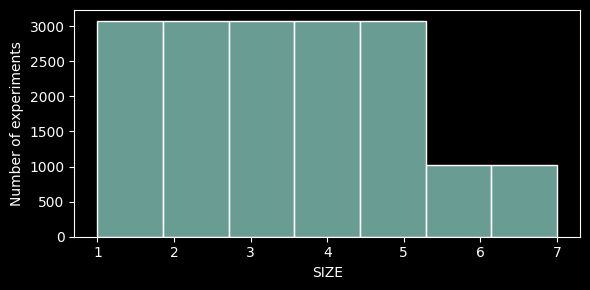

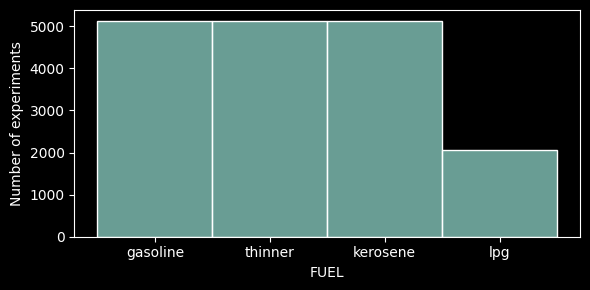

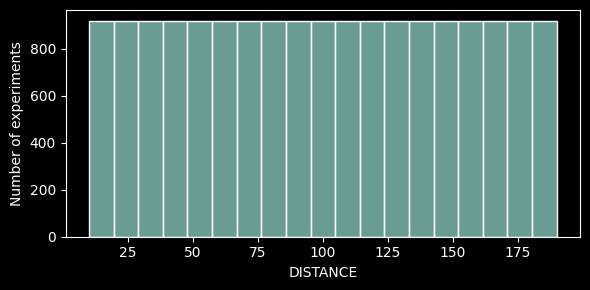

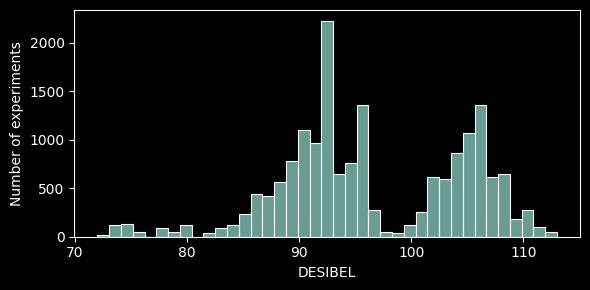

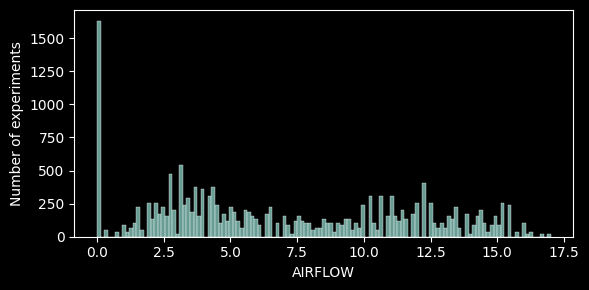

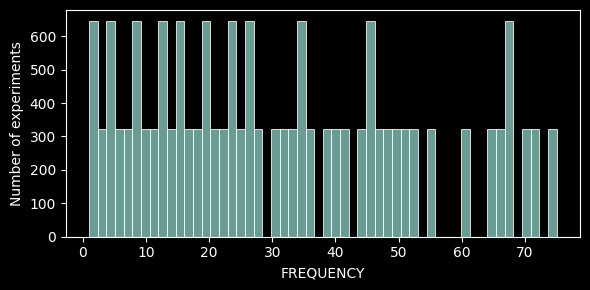

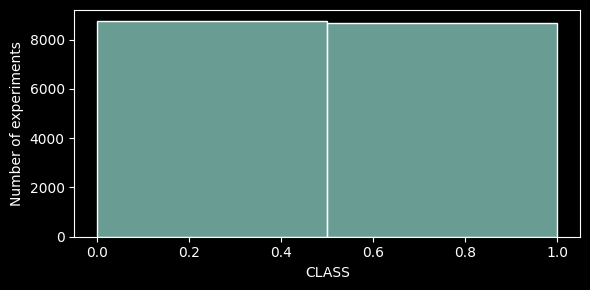

In [9]:
# let's check distributions for every feature
for column in df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column], bins=df[column].nunique())
    plt.xlabel(column)
    plt.ylabel('Number of experiments')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## Feature importance analysis

Let's check linear correlations for numerical features (`SIZE` is kind of categorical, encoded).
> Note: `CLASS` is the target variable

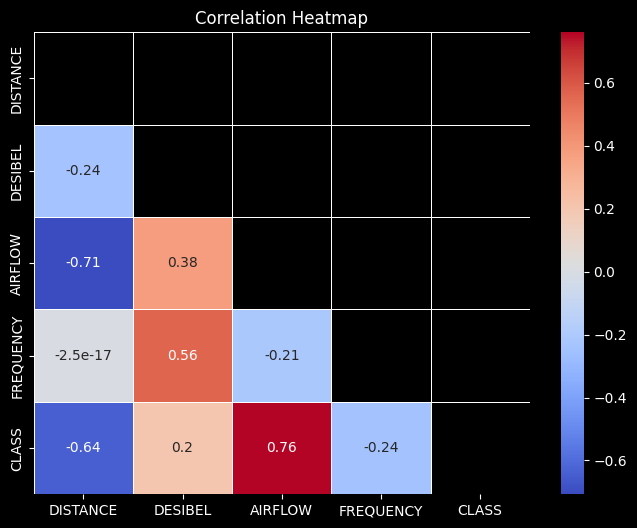

In [10]:
corr = df.drop(columns=['SIZE', 'FUEL']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Now we'll evaluate the predictive power of numerical features.

In [11]:
from sklearn.metrics import roc_auc_score

scores = {}
for feature in df.drop(columns=['SIZE', 'FUEL']).columns:
    scores[feature] = roc_auc_score(df.CLASS, df[feature])
    # if AUC score is below 0.5 - feature is negatively correlated with the target variable
    if scores[feature] < 0.5:
        # following is done for "visualization" purposes:
        scores[feature] = -roc_auc_score(df.CLASS, -df[feature])
# 1 or -1 indicate max correlation, 0.5 or -0.5 indicate min correlation
display("ROC AUC score:", sorted(scores.items(), key=lambda x: abs(x[1]), reverse=True))

'ROC AUC score:'

[('CLASS', 1.0),
 ('AIRFLOW', 0.9377292742193459),
 ('DISTANCE', -0.8713309567098402),
 ('FREQUENCY', -0.6135148767269827),
 ('DESIBEL', 0.5861035424421285)]

Following metrics allow to capture any statistical dependency and work for categorical features like `SIZE` and `FUEL`.

In [12]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

# included CLASS to CLASS scores for reference
mi_score = df.apply(lambda f: mutual_info_score(df.CLASS, f))
mi_score_norm = df.apply(lambda f: normalized_mutual_info_score(df.CLASS, f))

df_mi_scores = pd.DataFrame({"normalized mi_score": mi_score_norm,
                             "mi_score": mi_score})

df_mi_scores.round(3) \
            .sort_values(by=df_mi_scores.columns.to_list(), ascending=False)

c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


,normalized mi_score,mi_score
CLASS,1.000,0.693
AIRFLOW,0.153,0.399
DISTANCE,0.137,0.249
DESIBEL,0.083,0.162
FREQUENCY,0.047,0.110
SIZE,0.012,0.016
FUEL,0.003,0.003


## Modeling / Tuning

#### Preparing the split:

In [13]:
from sklearn.feature_extraction import DictVectorizer

random_generator = np.random.default_rng(seed=RAND_SEED)
sample = lambda frac: df.sample(frac=frac, 
                                random_state=random_generator, 
                                ignore_index=True)
df_train, df_val, df_test = sample(0.6), sample(0.2), sample(0.2)

y_train = df_train.pop('CLASS')
y_val = df_val.pop('CLASS')
y_test = df_test.pop('CLASS')

dv = DictVectorizer()
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [14]:
# returns and displays best value for `tuned_param_name`
def get_best_tuned_param(df_auc: DataFrame, tuned_param_name: str):
    # Getting the values of maximum score
    max_auc_id = df_auc['AUC'].idxmax()
    max_auc_value = df_auc['AUC'].max()
    # display("debug:", tuned_param_name)
    max_auc_tuned_param = df_auc.loc[max_auc_id, tuned_param_name]

    # Displaying the values with explanatory strings
    display("Tuning results:",
            f"Maximum AUC Score ({tuned_param_name}={max_auc_tuned_param}): {max_auc_value}")
    
    # special case, for RandomForestClassifier(max_features=None)
    if max_auc_tuned_param == "None":
        max_auc_tuned_param = None

    return max_auc_tuned_param

# visualization function, plots F1 and AUC scores
def plot_scores(df_auc: DataFrame, tuned_param_name: str) -> None:
    # Plotting AUC Scores
    plt.figure(figsize=(6,3))
    plt.plot(df_auc[tuned_param_name], df_auc['AUC'], label='AUC Score', color='orange', marker='o')
    plt.axvline(x=df_auc[tuned_param_name][df_auc['AUC'].idxmax()], color='red', 
                linestyle='dotted', label=f'Max AUC Score')

    # Formatting the plot
    plt.xlabel(tuned_param_name)
    plt.ylabel('Score')
    plt.title(f'`{tuned_param_name}` tuning')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Logistic Regression
Let's try linear model at first, we'll use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and tune it:
- we will tune `C` - the regularization term

'Tuning results:'

'Maximum AUC Score (C=5.3795918367346935): 0.8947891442972051'

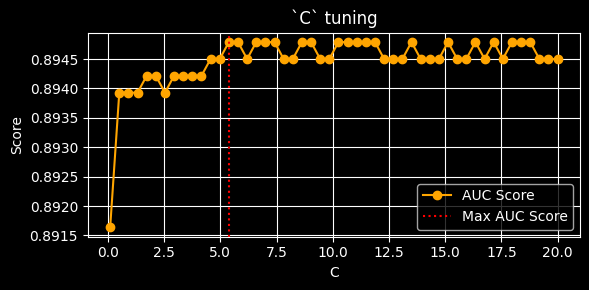

In [15]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

scores_auc = {}
tuned_param_name = 'C'
for C in np.linspace(0.1, 20):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=RAND_SEED)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    scores_auc[C] = roc_auc_score(y_val, y_val_pred)

df_auc = pd.DataFrame(scores_auc.items(), columns=[tuned_param_name, 'AUC'])
best_C = get_best_tuned_param(df_auc=df_auc, tuned_param_name=tuned_param_name)
plot_scores(df_auc=df_auc, tuned_param_name=tuned_param_name)

Let's check **feature importance** for our Logistic Regression model:

In [16]:
# Train the model using best tuned param
model = LogisticRegression(solver='liblinear', C=best_C, max_iter=1000, random_state=RAND_SEED)
model.fit(X_train, y_train)

# Getting feature names and weights
feature_weights = pd.DataFrame({'Feature': dv.feature_names_, 'Weight': model.coef_[0]})

# Displaying the DataFrame sorted by the absolute values of weights in descending order
feature_weights['Abs_Weight'] = feature_weights['Weight'].abs()
feature_weights_sorted = feature_weights.sort_values(by='Abs_Weight', ascending=False).drop('Abs_Weight', axis=1)

display(feature_weights_sorted)

,Feature,Weight
6,FUEL=lpg,3.062645
5,FUEL=kerosene,-1.660677
7,FUEL=thinner,-1.210968
8,SIZE,-0.903860
0,AIRFLOW,0.505697
4,FUEL=gasoline,-0.328327
3,FREQUENCY,-0.052937
1,DESIBEL,0.048196
2,DISTANCE,-0.025637


Now we'll train and tune **tree-based** models:

----

#### Random Forest

We will train [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and tune:
- `n_estimators` - number of trees in the forest
- `max_depth` - maximum depth of the tree
- `criterion` - function to measure the quality of a split
- `max_features` - number of features to consider when looking for the best split

In [17]:
from sklearn.ensemble import RandomForestClassifier

# we will add tuned params here, base params for now
best_rf_params = {'random_state': RAND_SEED, 
                     'n_jobs':-1}

In [18]:
# we will reuse this, returns AUC scores Dataframe
def train_eval_model(tuned_param_name: str, tuning_list: list) -> DataFrame:
    scores_auc = {}
    if None not in tuning_list:
        tuning_list = sorted(tuning_list)
    if tuned_param_name in best_rf_params:
        del best_rf_params[tuned_param_name]
    display("Currently used params:", best_rf_params,
            f"tuning `{tuned_param_name}`...")

    for tuned_param_value in tuning_list:
        rf_clf = RandomForestClassifier(**{tuned_param_name: tuned_param_value}, 
                                    **best_rf_params)
        rf_clf.fit(X_train, y_train)

        y_val_pred = rf_clf.predict(X_val)
        # special case, for RandomForestClassifier(max_features=None)
        if tuned_param_value is None:
            tuned_param_value = "None"
        scores_auc[tuned_param_value] = roc_auc_score(y_val, y_val_pred)

    df_auc = pd.DataFrame(scores_auc.items(), columns=[tuned_param_name, 'AUC'])

    return df_auc

- `n_estimators` tuning:

'Currently used params:'

{'random_state': 42, 'n_jobs': -1}

'tuning `n_estimators`...'

'Tuning results:'

'Maximum AUC Score (n_estimators=190): 0.9873876184229344'

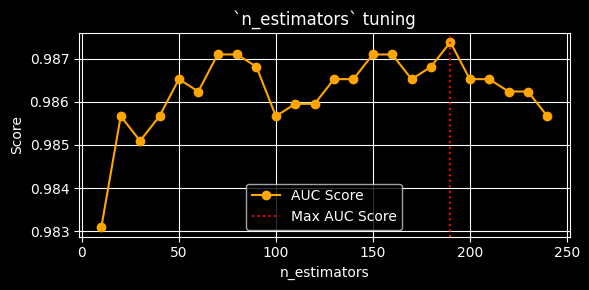

In [19]:
tuned_param_name = 'n_estimators'
tuning_list = range(10, 250, 10)

df_auc = train_eval_model(tuned_param_name=tuned_param_name, tuning_list=tuning_list)

best_rf_params[tuned_param_name] = get_best_tuned_param(df_auc, tuned_param_name)
plot_scores(df_auc, tuned_param_name)

- `max_depth` tuning:

'Currently used params:'

{'random_state': 42, 'n_jobs': -1, 'n_estimators': 190}

'tuning `max_depth`...'

'Tuning results:'

'Maximum AUC Score (max_depth=22): 0.9873876184229344'

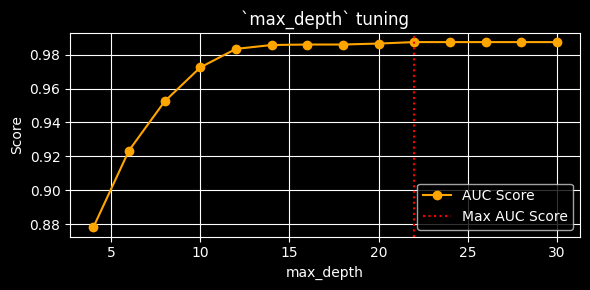

In [20]:
tuned_param_name = 'max_depth'
tuning_list = range(4, 32, 2)

df_auc = train_eval_model(tuned_param_name, tuning_list)

best_rf_params[tuned_param_name] = get_best_tuned_param(df_auc, tuned_param_name)
plot_scores(df_auc, tuned_param_name)

`criterion` tuning:

'Currently used params:'

{'random_state': 42, 'n_jobs': -1, 'n_estimators': 190, 'max_depth': 22}

'tuning `criterion`...'

'Tuning results:'

'Maximum AUC Score (criterion=log_loss): 0.9876741513742239'

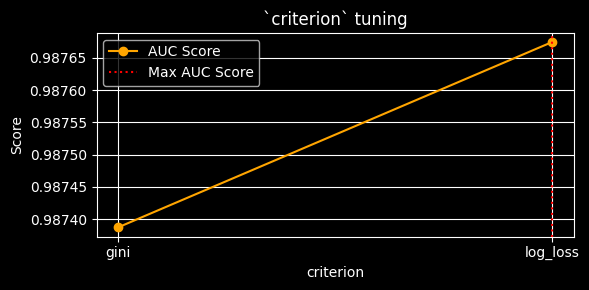

In [21]:
tuned_param_name = 'criterion'
tuning_list = ["gini", "log_loss"]

df_auc = train_eval_model(tuned_param_name, tuning_list)

best_rf_params[tuned_param_name] = get_best_tuned_param(df_auc, tuned_param_name)
plot_scores(df_auc, tuned_param_name)

`max_features` tuning:

'Currently used params:'

{'random_state': 42,
 'n_jobs': -1,
 'n_estimators': 190,
 'max_depth': 22,
 'criterion': 'log_loss'}

'tuning `max_features`...'

'Tuning results:'

'Maximum AUC Score (max_features=None): 0.9888199543980261'

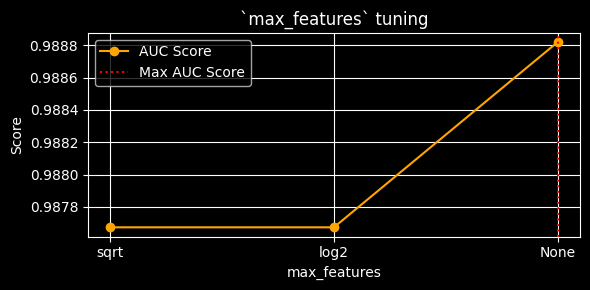

In [22]:
tuned_param_name = 'max_features'
tuning_list = ["sqrt", "log2", None]

df_auc = train_eval_model(tuned_param_name, tuning_list)

best_rf_params[tuned_param_name] = get_best_tuned_param(df_auc, tuned_param_name)
plot_scores(df_auc, tuned_param_name)

Let's check **feature importance** for our Random Forest model:

In [23]:
# Train the model using best tuned params
rf_clf = RandomForestClassifier(**best_rf_params)
rf_clf.fit(X_train, y_train)

df_imp = pd.DataFrame({'feature': dv.get_feature_names_out(), 'importance': rf_clf.feature_importances_})
display(df_imp.sort_values(by='importance', ascending=False))

,feature,importance
0,AIRFLOW,0.559627
3,FREQUENCY,0.126422
2,DISTANCE,0.115608
8,SIZE,0.105883
4,FUEL=gasoline,0.025893
1,DESIBEL,0.021382
5,FUEL=kerosene,0.016929
7,FUEL=thinner,0.016510
6,FUEL=lpg,0.011746


----

#### XGBoost

We will train [XGBoost model](https://xgboost.readthedocs.io/en/stable/tutorials/model.html) and tune:
- `max_depth` - maximum depth of trees
- `subsample` - subsample ratio of the training examples
- `n_estimators` - number of boosting rounds.

This time we will use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for tuning.

In [24]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parameters to tune using GridSearchCV
param_grid = {
    'max_depth': range(2, 12),
    'subsample': [0.7, 0.8, 0.9, 1],
    'n_estimators': [100, 200, 300, 400, 500],

    'eta': [0.1],  # experimented with eta, 0.1 is ok, not tuning here for faster execution
    'random_state': [RAND_SEED]
}

# Initialize the classifier
xgb_clf = xgb.XGBClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.1], 'max_depth': range(2, 12),
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [42],
                         'subsample': [0.7, 0.8, 0.9, 1]},
             scoring='roc_auc', verbose=2)

In [25]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best GridSearchCV AUC Score:", grid_search.best_score_)

best_xgb_params = grid_search.best_params_
best_xgb_clf = grid_search.best_estimator_

y_pred = best_xgb_clf.predict(X_test)
print("Best model's TEST AUC score:", roc_auc_score(y_test, y_pred))

Best Parameters: {'eta': 0.1, 'max_depth': 10, 'n_estimators': 500, 'random_state': 42, 'subsample': 0.9}
Best GridSearchCV AUC Score: 0.9963230009231298
Best model's TEST AUC score: 0.9916960433547302


Let's take a look at GridSearchCV's per-param tuning results visualization.

Brief explanation of plots:  
- Rank (`rank_test_score`) indicates the performance rank of each parameter combination, with rank 1 being the best ("bright"-colored dots being better ranks, "dark"-colored worse ranks)
- partially-transparent "wide line" (shadow) around the main trend line represents confidence interval.

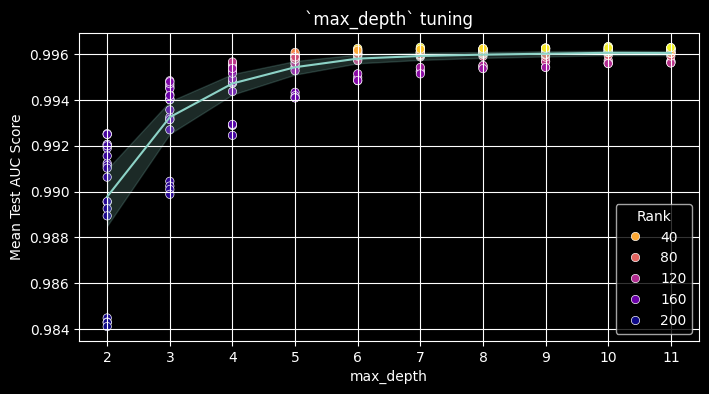

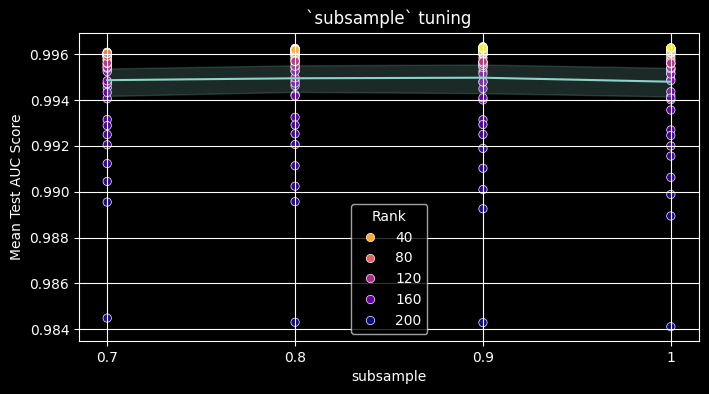

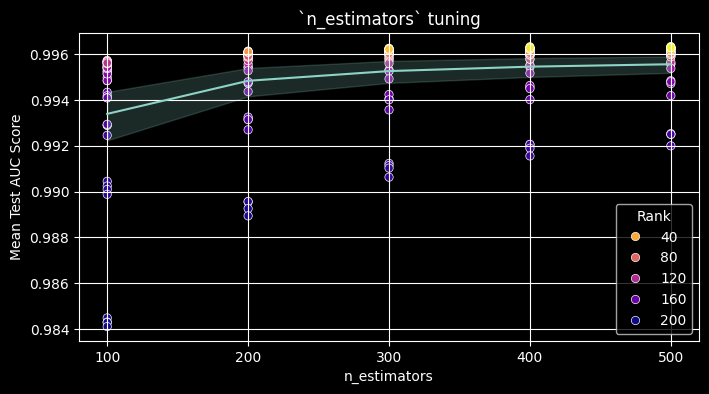

In [26]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Loop through each hyperparameter in the parameter grid
for param in param_grid.keys():
    # Don't plot the hyperparameter if it only has one value
    if len(param_grid[param]) == 1:
        continue
    # For plotting, we convert any numeric dimensions to float and leave categorical ones as is
    if cv_results_df[f'param_{param}'].dtype.kind in 'biufc':
        # Continuous parameter - can simply plot as is
        x = cv_results_df[f'param_{param}'].astype(float)
    else:
        # Categorical parameter - need to convert to string for plotting purposes
        x = cv_results_df[f'param_{param}'].astype(str)
    
    # Create a scatter plot with a regression line to show the trend
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x, y=cv_results_df['mean_test_score'], hue=cv_results_df['rank_test_score'], palette='plasma_r')
    sns.lineplot(x=x, y=cv_results_df['mean_test_score'], markers=True)
    
    # Customizing the plot
    plt.title(f'`{param}` tuning')
    plt.xlabel(param)
    plt.ylabel('Mean Test AUC Score')
    plt.legend(title='Rank', loc='best')
    plt.grid(True)
    plt.show()

Let's check **feature importance** for our XGBoost model:

In [27]:
feature_importance_df = pd.DataFrame({'Feature': dv.feature_names_, 'Importance': best_xgb_clf.feature_importances_}
                                     ).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


         Feature  Importance
0        AIRFLOW    0.439716
6       FUEL=lpg    0.147508
8           SIZE    0.078857
2       DISTANCE    0.075151
3      FREQUENCY    0.070099
4  FUEL=gasoline    0.062773
5  FUEL=kerosene    0.053782
7   FUEL=thinner    0.046322
1        DESIBEL    0.025791


## Final model training/selection

----

Looks like we have similar scores for **Random Forest** and **XGBoost** models.  
We'll do the following steps for both models: 
- [**K-Fold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) cross-validation
- final training (using `train` + `val` sets) and selection (using `test` set)

In [28]:
from sklearn.model_selection import KFold

x_train_full = pd.concat([df_train, df_val])
y_train_full = pd.concat([y_train, y_val])

dv_full = DictVectorizer()
x_train_full_csr = dv_full.fit_transform(x_train_full.to_dict(orient='records'))
x_test_full_csr = dv_full.transform(df_test.to_dict(orient='records'))

#### K-Fold cross-validation

In [29]:
# %%capture output

def kfold_eval(x_train_full: pd.DataFrame, y_train_full: pd.DataFrame) -> tuple[list, list]:
	kfold = KFold(n_splits=5, shuffle=True, random_state=RAND_SEED)
	scores_rf = []
	scores_xgb = []
	for train_idx, val_idx in kfold.split(x_train_full):
		x_train_fold = x_train_full.iloc[train_idx]
		x_val_fold = x_train_full.iloc[val_idx]
		y_train_fold = y_train_full.iloc[train_idx]
		y_val_true_fold = y_train_full.iloc[val_idx]
		
		dv_fold = DictVectorizer()
		x_train_fold = dv_fold.fit_transform(x_train_fold.to_dict(orient='records'))
		x_val_fold = dv_fold.transform(x_val_fold.to_dict(orient='records'))
		
		rf_clf = RandomForestClassifier(**best_rf_params)
		rf_clf.fit(x_train_fold, y_train_fold)
		y_val_pred_rf = rf_clf.predict(x_val_fold)
		scores_rf += [roc_auc_score(y_val_true_fold, y_val_pred_rf)]

		xgb_clf = xgb.XGBClassifier(**best_xgb_params)
		xgb_clf.fit(x_train_fold, y_train_fold)
		y_val_pred_xgb = xgb_clf.predict(x_val_fold)
		scores_xgb += [roc_auc_score(y_val_true_fold, y_val_pred_xgb)]

	return scores_rf, scores_xgb

scores_rf, scores_xgb = kfold_eval(x_train_full, y_train_full)

In [30]:
print("Random Forest's K-Fold AUC mean_score +- std:\t", np.mean(scores_rf), "+-", np.std(scores_rf))
print("XGBoost model's K-Fold AUC mean_score +- std:\t", np.mean(scores_xgb), "+-", np.std(scores_xgb))

Random Forest's K-Fold AUC mean_score +- std:	 0.979016918959901 +- 0.002310139351475604
XGBoost model's K-Fold AUC mean_score +- std:	 0.9825317652143051 +- 0.0014220850635194048


#### Final training (`train` + `val` sets)

In [31]:
rf_clf = RandomForestClassifier(**best_rf_params)
rf_clf.fit(x_train_full_csr, y_train_full)
y_test_pred_rf = rf_clf.predict(x_test_full_csr)
final_score_rf = roc_auc_score(y_test, y_test_pred_rf)

xgb_clf = xgb.XGBClassifier(**best_xgb_params)
xgb_clf.fit(x_train_full_csr, y_train_full)
y_test_pred_xgb = xgb_clf.predict(x_test_full_csr)
final_score_xgb = roc_auc_score(y_test, y_test_pred_xgb)

print("Random Forest's final AUC score:\t", final_score_rf)
print("XGBoost model's final AUC score:\t", final_score_xgb)

Random Forest's final AUC score:	 0.992293223192676
XGBoost model's final AUC score:	 0.9931258549931601


Looks like **XGBoost model** is a bit better.

Let's save best training params to JSON file, so we can use it later.

In [32]:
best_xgb_params

{'eta': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 0.9}

In [33]:
import json

with open('best_xgb_params.json', 'w') as outfile:
    json.dump(best_xgb_params, outfile, indent=4)

# sanity check
with open('best_xgb_params.json', 'r') as infile:
    best_xgb_params_loaded = json.load(infile)

best_xgb_params_loaded

{'eta': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 0.9}